# Universidade Federal do Rio Grande do Sul (UFRGS)
# Programa de Pós-Graduação em Engenharia Civil (PPGEC) 
## PEC00025: Introdução à teoria de vibrações
### Aluno: Yuri Claudio Vieira da Costa - 305306
#### RESPOSTA DE UM PÓRTICO PLANO À UMA CARGA DE IMPACTO

## Sumário

[1.   INTRODUÇÃO](#section_1) 

[1.1.  Estrutura](#section_11)

[2. CÁLCULO DOS 4° PRIMEIROS MODOS DE VIBRAÇÃO](#section_2)

[3. CARGA DE IMPACTO](#section_3)

[4. CARGA DE IMPACTO NA ESTRUTURA](#section_4)

[5.   RESULTADOS E DISCUSSÃO](#section_5)

[     REFERÊNCIAS](#section_6)

## 1. INTRODUÇÃO <a name="section_1"></a>

Este trabalho analisa a resposta de um portico plano a um impacto. Assim, são calculados os quatro primeiros modos de vibração da estrutura, a amplitude máxima do deslocamento (u_max) no nó que recebe o impacto, os fatores de amortecimento e o gráfico do deslocamento (u(t)).  

### 1.1. Estrutura <a name="section_11"></a>

A estrutura analisada é um portico plano com 36 metros de altura e base de 3 metros. A estrutura apresenta estas características para propositalmente apresentar frequência natural abaixo de 2 Hz. A estrutura foi modelada no programa Ftool com o objetivo de obter a matriz de rigidez da mesma. A estrutura é apresentada abaixo. 

<img src="portico.png" alt="Estrutura analisada" width=150 height=150>

A estrutura apresenta 1 grau de liberdade por nó, utilizando o método dos deslocamentos, cada nó recebeu um deslocamento unitário e com esse porcesso foi calculada a matriz de rigidez ($\mathbf{K}$) da estrutura. O método das forças também pode ser utilizado, mas como esse último processo é mais onoroso, foi utilizado o método dos deslocamentos.  
Na portico, as lajes são modeladas para sofrerem deslocamento de corpo rígido. Cada pavimento apresenta massa estimada de 18000 kg. 


## 2. CÁLCULO DOS 4° PRIMEIROS MODOS DE VIBRAÇÃO <a name="section_2"></a>

Utilizando a matriz de rigidez ($\mathbf{K}$) e a matriz de massas Lumped ($\mathbf{M}$) do portico, foram calculados os autovalores e autovetores da estrutura. Para esse procedimento foi utilizado o algoritimo "scipy.linalg.eig". Nesse algoritmo, os autovalores são fornecidos em frequência angular ao quadrado.   

In [6]:
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt

#matriz de rigidez da estrutura
k1 = -2962962.8*np.eye(12, 12, -1)
k2 = 5925925.6*np.eye(12, 12, 0)
k3 = -2962962.8*np.eye(12, 12, 1)
k4 = np.zeros((12, 12))
k4 = k1+k2+k3 
k4[0,0]=2962962.8
print ("Matriz de Rigidez (K) [N/m] \n",k4)

#matriz de massa
mt = 18000*np.eye(12)
print ("Matriz de Massa (M) [kg] \n",mt)

# Calculando os autovalores e autovetores
w2, Phi = sc.eig(k4, mt)

iw   = w2.argsort()
w2  = w2[iw]
Phi = Phi[:,iw]

# Autovalores para frequências
wk3  = np.sqrt(np.real(w2)) 
fk3  = wk3/2/np.pi

print ("Frequências [Hz] \n",fk3)
print ("Autovetores [escala arbitrária]\n",Phi)

Matriz de Rigidez (K) [N/m] 
 [[ 2962962.8 -2962962.8        0.         0.         0.         0.
         0.         0.         0.         0.         0.         0. ]
 [-2962962.8  5925925.6 -2962962.8        0.         0.         0.
         0.         0.         0.         0.         0.         0. ]
 [       0.  -2962962.8  5925925.6 -2962962.8        0.         0.
         0.         0.         0.         0.         0.         0. ]
 [       0.         0.  -2962962.8  5925925.6 -2962962.8        0.
         0.         0.         0.         0.         0.         0. ]
 [       0.         0.         0.  -2962962.8  5925925.6 -2962962.8
         0.         0.         0.         0.         0.         0. ]
 [       0.         0.         0.         0.  -2962962.8  5925925.6
  -2962962.8        0.         0.         0.         0.         0. ]
 [       0.         0.         0.         0.         0.  -2962962.8
   5925925.6 -2962962.8        0.         0.         0.         0. ]
 [       0.    

Outro método que poderia ser utilizado para calcular os autovalores e autovetores é por meio ma matriz de dinâmica ($\mathbf{D}$ = $\mathbf{K}^{-1}$ $\mathbf{M}$). Utilizando o algoritmo "sc.eig($\mathbf{D}$)".
Conforme solicitado no trabalho, são plotados os quatros primeiros modos de vibração. Normalmente os primeiros modos, dependendo do valor de sua frequência e da carga externa que a estrutura venha a sofrer, são os mais importantes em uma análise dinâmica. 

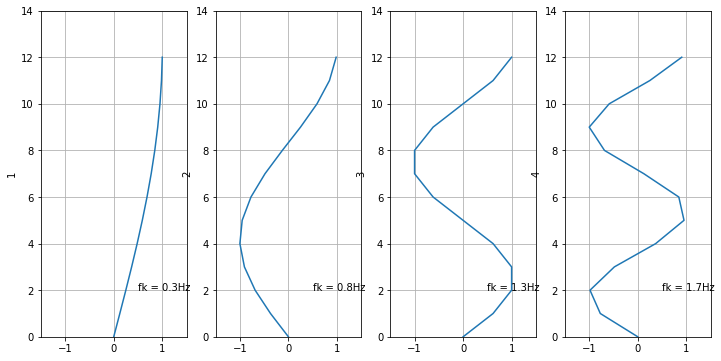

In [7]:
#Plotando os 4 primeiros modos 
plt.figure(1, figsize=(12,6))
x = np.arange(13)

for k in range(4):
    pk = np.zeros(13)
    pk[1:] = Phi[::-1,k]
    
    pk /= np.max(np.abs(pk))   # Normalizando (dividindo todos os valores pelo valor máximo)
    
    plt.subplot(1,4,k+1)
    plt.plot(pk, x)
    
    plt.xlim(-1.5, 1.5);  plt.ylabel(str(k+1));
    plt.ylim( 0.0, 14);
    plt.text( 0.5, 2.0, 'fk = {0:3.1f}Hz'.format(fk3[k]));
    plt.grid(True)

Percebemos que o primeiro modo apresenta amplitude máxima no seu topo, local onde neste trabalho é aplicada a carga de impulso. A frequência natural da estrutura apresenta valor de 0.25643131 Hz. A amplitude dos modos foram normalizadas.

## 3. CARGA DE IMPACTO <a name="section_3"></a>

Uma carga de impacto de 10.000 N é aplicada no ponto 1 da estrutura (ver figura do portico). Seu tempo de duração do impacto (td) é propositalmente adotado em função da maior frequência da estrutura analisada. Assim, na prática a estrutura apresenta uma velocidade inicial (vo) em um ponto, no caso, o ponto 1. Nos demais, a velocidade inicial é considerada zero. A velocidade inicial da estrutura pode ser calculada pela fórmula:
$$ vo = \frac{Fa} {m} \, td \, $$

In [8]:
fmax = np.max(fk3) #frequência máxima
print ("Maior frequência da estrutura [Hz] \n", fmax)
Fa = 10000 # Força aplicada
Tn = 1/fmax #Período
td = Tn/4 #Tempo de aplicação da carga
print("Duração do impacto [s] \n", td)
m = 18000 #massa do pavimento de aplicação do impacto
vo = Fa*td/m #velocidade inicial do pórtico
print("Velocidade inicial da estrutura [m/s] \n",vo)
vo_v = [vo, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print("Vetor velocidade (velocidade em cada nó) [m/s] \n",vo_v)
uo_v = np.zeros(12)

Maior frequência da estrutura [Hz] 
 4.051714721225485
Duração do impacto [s] 
 0.061702271063246224
Velocidade inicial da estrutura [m/s] 
 0.03427903947958123
Vetor velocidade (velocidade em cada nó) [m/s] 
 [0.03427903947958123, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 4. CARGA DE IMPACTO NA ESTRUTURA <a name="section_4"></a>

Neste trabalho uma carga de impacto atinge a estrutura no nó 1. Para o cálculo da resposta da estrutura temos.
A massa modal pode ser calculado por:

$$ \vec{\varphi^t}_k\, \mathbf{M}\, \vec{\varphi}_k\  = \mathbf{M_k}\ $$

A aceleração e o deslocamento são:

$$ \ddot{\vec{u}}(t) = -\omega_k^2 u_{k0} \sin \left( \omega_k t + \theta_k \right) \, \vec{\varphi}_k $$

$$ \vec{u}(t) = -\omega_k^2 u_{k0} \cos \left( \omega_k t + \theta_k \right) \, \vec{\varphi}_k $$

O deslocamento pode ser calculado por:

$$ \vec{u}(t) = \ u_{kmax} \cos \left( \omega_k t - \theta_k \right) \, \vec{\varphi}_k $$

E a amplitude pode ser calculada com:

$$ \vec{\varphi}_i\, \mathbf{M}\, \vec{V}_o\ = -\ u_{imax} \omega_i\ \sin \left( - \theta_i \right) \, M_i $$

Calculando a resposta da estrutura a carga de impacto pela formulação abaixo, temos:

Amplitude no nó: 1  =  0.010278957979768253
Amplitude no nó: 2  =  0.009380609410240315
Amplitude no nó: 3  =  0.003905309835420475
Amplitude no nó: 4  =  0.0034671125592757443
Amplitude no nó: 5  =  0.0012388534114490637
Amplitude no nó: 6  =  0.0010452689312687399
Amplitude no nó: 7  =  0.0012647114853231484
Amplitude no nó: 8  =  0.0004984473015382905
Amplitude no nó: 9  =  0.0006623159638036049
Amplitude no nó: 10  =  0.0005556975704979408
Amplitude no nó: 11  =  0.0004004897487661271
Amplitude no nó: 12  =  0.00013880326696931585
Valor máximo de u nó 1: 0.008633662277017305


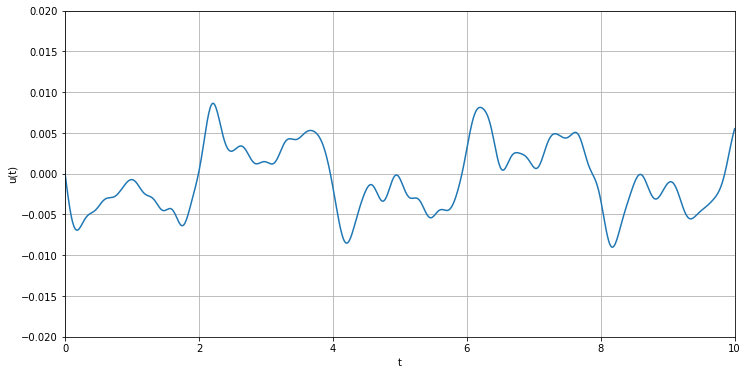

In [9]:
Phit = Phi.transpose()
xi = np.pi/2 #Fase (pi/2) para todos, pois é o maior valor do seno.
UMAX = np.zeros(12)

for k in range(12):

    Mi = np.dot(np.dot(Phit[k], mt),Phi[k]) # massa modal
    umax = (np.dot(np.dot(Phit[k], mt), vo_v))/(wk3[k]*np.sin(xi)*Mi)# Cálculo das amplitude máxima 
    UMAX[k] = umax
    print("Amplitude no nó:", k+1, ' = ' , UMAX[k]) 
    
t = np.linspace(0,10,1000)
uk = np.zeros((12, 1000))

for k in range(12):
    uk[k,:] = UMAX[k]*np.cos(-wk3[k]*t - np.pi/2) 
u = np.dot(Phi, uk)
print("Valor máximo de u nó 1:", max(u[0,:]))
plt.figure(2,figsize=(12,6))
plt.plot(t,u[0,:]) # Plotando para o nó 1 (nó de aplicação do impulso)
plt.xlim(0.0,10); plt.xlabel("t");
plt.ylim(-0.02,0.02); plt.ylabel("u(t)"); 
plt.grid(True)

O gráfico representa o deslocamento do nó 1 após o impacto da carga de 10.000 N.
A partir de dois fatores de amortecimento e duas frequências angulares, podemos calcular os demais fatores, conforme cálculo a seguir:

<img src="amortecimento.png" alt="Estrutura analisada" width=300 height=300>

In [10]:
zeta = np.zeros(12)
zeta[0] = 0.01
zeta[1] = 0.01
alfa1 = 2*(zeta[0]*wk3[0]-zeta[1]*wk3[1])/(wk3[0]**2-wk3[1]**2)
alfa0 = 2*zeta[0]*wk3[0]-alfa1*wk3[1]**2

for k in range(10):
    zeta[k+2] = (alfa0/(2*wk3[k+2]))+(alfa1*wk3[k+2]/2)
print("Fatores de amortecimento: \n", zeta)

Fatores de amortecimento: 
 [0.01       0.01       0.00984229 0.01519787 0.01997087 0.02426267
 0.02807475 0.03137976 0.03414311 0.03633133 0.03791596 0.03887557]


O valor dos fatores de amortecimento vão reduzindo conforme a frequência angular cresce.

## 5. RESULTADOS E DISCUSSÃO <a name="section_5"></a>

Inicialmente modelamos o portico plano no Ftool com o objetivo de calcular a matriz de rigidez. Com esta e a matriz de massa é possível calcular os autovalores e autovetores da estrutura. A frequência nautral da estrutura ficou abixo de 2 Hz, como esperado. O primeiro modo de vibração combina com a aplicação da carga de impulso adotada neste trabalho. Com os autovetores e autovalores é possível calcular a resposta da estrutura à carga de impacto e calcular os fatores de amortecimento. 

## REFERÊNCIAS <a name="section_6"></a>

Notas de aula do professor [Marcelo Rocha](https://nbviewer.jupyter.org/github/mmaiarocha/PEC00025/blob/master/resources/Class_05_NumericalIntegration.ipynb?flushcache=true). 